# Executive Summary

This report is designed to examine the King County Sales dataset and based on that a model will be built to help predict the price of the housing market in this County.

We are two freelance data scientists that were hired by a real estate agency who wishes to enter the housing market in Seattle.

The client has raised the questions of:

What factors affect the price in King County?
Which factor has the biggest impact on price?
How our recommendations might look like?

In this report, our approach was first to examine the dataset. The next step was to create a dataset without any null values or placeholders values so we could work with it in order to build a model for price prediction. We also used visualisation to see whether location also plays an active role in affecting price or not. According to our visualisation, we could also detect the relationship between price and other factors.

This methodology has resulted in findings of living area square footage and grade are the most powerful factors. Meanwhile, location also has a big impact on price as the closer to the center(Seattle) a house is located, the higher price should be offered. Houses located near the coast are generally more expensive. Houses with waterfront are generally more expensive, however, due to the fact that there are very few of them waterfront does not belong to the list of factors strongly affecting price in the County.

Houses with waterfront must be offered with higher price and the same goes for houses with three bedrooms  as they are in demand.

# Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
kc_df = pd.read_csv("kc_house_data.csv")

In [3]:
kc_df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

# Data Cleaning

Examining the dataset

In [4]:
# checking for missing data overall
kc_df.info() # missing data in waterfront, yr_renovated

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


It seems that the dataset has 21597 rows and 21 columns. Out from all the columns, waterfront and yr_renovated have missing values.

In [5]:
kc_df.describe().T

count          mean           std           min  \
id             21597.0  4.580474e+09  2.876736e+09  1.000102e+06   
price          21597.0  5.402966e+05  3.673681e+05  7.800000e+04   
bedrooms       21597.0  3.373200e+00  9.262989e-01  1.000000e+00   
bathrooms      21597.0  2.115826e+00  7.689843e-01  5.000000e-01   
sqft_living    21597.0  2.080322e+03  9.181061e+02  3.700000e+02   
sqft_lot       21597.0  1.509941e+04  4.141264e+04  5.200000e+02   
floors         21597.0  1.494096e+00  5.396828e-01  1.000000e+00   
waterfront     19221.0  7.595859e-03  8.682485e-02  0.000000e+00   
view           21534.0  2.338627e-01  7.656862e-01  0.000000e+00   
condition      21597.0  3.409825e+00  6.505456e-01  1.000000e+00   
grade          21597.0  7.657915e+00  1.173200e+00  3.000000e+00   
sqft_above     21597.0  1.788597e+03  8.277598e+02  3.700000e+02   
yr_built       21597.0  1.971000e+03  2.937523e+01  1.900000e+03   
yr_renovated   17755.0  8.363678e+01  3.999464e+02  0.000000e+00   
zipcode        21597.0  9.807795e+04  5.351307e+01  9.800100e+04   
lat            21597.0  4.756009e+01  1.385518e-01  4.715590e+01   
long           21597.0 -1.222140e+02  1.407235e-01 -1.225190e+02   
sqft_living15  21597.0  1.986620e+03  6.852305e+02  3.990000e+02   
sqft_lot15     21597.0  1.275828e+04  2.727444e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.220000e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.430000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068500e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747110e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222310e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

In [6]:
kc_df.shape

(21597, 21)

In [7]:
kc_df.duplicated().sum() # no duplicates

0

There is no duplicates in the dataset.

In [8]:
kc_df.isna().any() # null values in waterfront, view, yr_renovated

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [9]:
kc_df.isnull().sum().sort_values(ascending=True) # equivalent to isna().sum()
# view has 63 null values, waterfront 2376 and yr_renovated 3842

id                  0
long                0
lat                 0
zipcode             0
yr_built            0
sqft_basement       0
sqft_above          0
grade               0
sqft_living15       0
condition           0
floors              0
sqft_lot            0
sqft_living         0
bathrooms           0
bedrooms            0
price               0
date                0
sqft_lot15          0
view               63
waterfront       2376
yr_renovated     3842
dtype: int64

View, waterfront and yr_renovated have null values. View 

In [10]:
for col in kc_df.columns:
    print (col, "\n", kc_df[col].value_counts(normalize=True).head(), "\n\n")
# unusual data in sqft_basement, 2%

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006575
6/25/2014    0.006066
6/26/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    

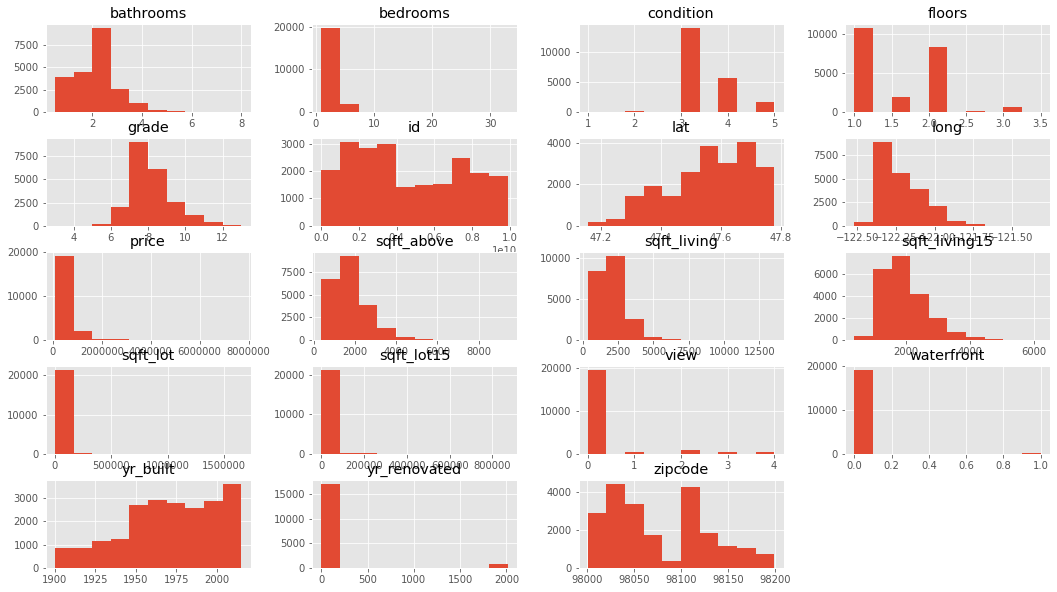

In [11]:
kc_df.hist(figsize=(18,10)); # check skewness and kurtosis to see whether the data is normally distributed or not
# this might help us to see whether to use log transformation which will help to plan model more precisely
# data which is not normally distributed may have a lot of outliers which affect our models
# that's when feature scaling comes in

In [12]:
# examining column yr_renovated as it has the biggest number of missing values
len(kc_df[kc_df['yr_renovated'].isna()])/len(kc_df) # the percentage of null values compared to the whole DF is around 18%, quite small

0.17789507802009538

In [13]:
# how many unique values does yr_renovated contain
kc_df['yr_renovated'].nunique() # question is - do I want to drop the whole colum or to replace it with other values?

70

In [14]:
# how many unique values does yr_renovated contain
kc_df['yr_renovated'].unique() 

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

Since yr_renovated has the biggest number of null values. Histogram has showed us that most of the values are around 0. The percentage of null values in yr_renovated compared to the whole dataset is 18%. Not too high, however, due to the fact that only few rows in this column contain actual year of renovation. We have decided to eliminate the whole column.

In [15]:
kc_df = kc_df.drop('yr_renovated', axis=1)

In [16]:
kc_df.info() # checking the dataset again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(11), object(2)
memory usage: 3.3+ MB


Next we move to column waterfront. 

In [17]:
len(kc_df[kc_df['waterfront'].isna()])/len(kc_df)

0.11001527989998611

In [18]:
kc_df['waterfront'].nunique()

2

In [19]:
kc_df['waterfront'].unique() 

array([nan,  0.,  1.])

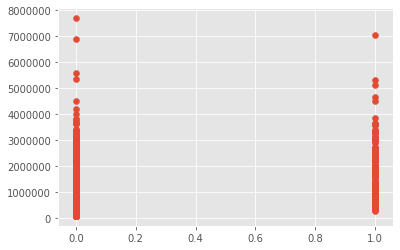

In [20]:
plt.scatter(kc_df['waterfront'], kc_df['price'])

Waterfront column is comprised of categorical values. In this case, we decided to replace null values by using mode.

In [21]:
mode_waterfront = kc_df['waterfront'].mode() 

In [22]:
mean_mode = mode_waterfront.mean()

In [23]:
kc_df["waterfront"] = kc_df["waterfront"].fillna(value=mean_mode)

In [24]:
kc_df['waterfront'].unique() 

array([0., 1.])

Continue to view column

In [25]:
len(kc_df[kc_df['view'].isna()])/len(kc_df)

0.0029170718155299346

In [26]:
kc_df['view'].nunique()

5

In [27]:
kc_df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

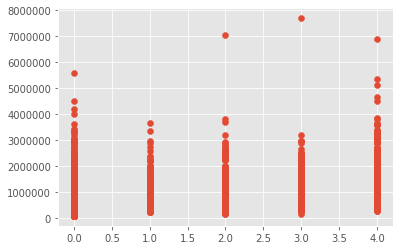

In [28]:
plt.scatter(kc_df['view'], kc_df['price'])

Another column with categorical values. Since the percentage is very low. We can replace the null values with mode.

In [29]:
mode_view = kc_df['view'].mode() 

In [30]:
mode_view.mean()

0.0

In [31]:
kc_df["view"] = kc_df["view"].fillna(value=mode_view.mean())

In [32]:
kc_df['view'].unique()

array([0., 3., 4., 2., 1.])

Next, we are going to take care of the question mark in sqft_basement.

In [33]:
def change_input(value):
    if value== '?':
        return 0
    else:
        return int(float(value))
kc_df.sqft_basement=kc_df.sqft_basement.map(lambda x:change_input(x))
kc_df.sqft_basement.value_counts(normalize=True)

0       0.614900
600     0.010048
500     0.009677
700     0.009631
800     0.009307
          ...   
1816    0.000046
1880    0.000046
1960    0.000046
2120    0.000046
1135    0.000046
Name: sqft_basement, Length: 303, dtype: float64

Detecting outliers

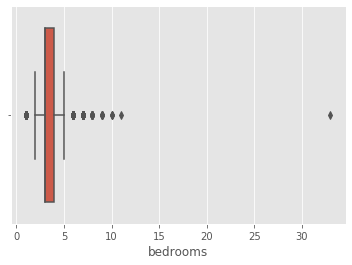

In [34]:

sns.boxplot(x=kc_df['bedrooms'])

We have detected some outliers in the DataFrame. However, we decided to keep them as changing their values might have an impact on our model later on.

# Subsetting Hypotheses

Our first question is to see whether location, latitude and longtitude, can affect the price by using folium to visualise our properties on maps.

In [35]:
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster


In [36]:
# check if we are really in King County, USA
waterfront = kc_df[(kc_df['waterfront'] == 1)]
len(waterfront)
waterfront_map = folium.Map(location=[47.6561, -122.005],
                        zoom_start=13,
                        tiles='openstreetmap')
                        
for i in waterfront.index:
    lat = waterfront.lat[i]
    long = waterfront.long[i]
    marker = folium.Marker([lat, long]).add_to(waterfront_map)
    
waterfront_map # seems like we are

In [37]:
# in this map below, we can see the price and sqft_living 
# thought this would be easier to compare but it is taking quite s

for i in waterfront.index:
    lat = waterfront.lat[i]
    long = waterfront.long[i]
    price = waterfront.price[i]
    sqft_living = waterfront.sqft_living[i]
    marker = folium.Marker([lat, long]).add_to(waterfront_map)
    popup_text = "Price: {}, Sqft: {}".format(price,sqft_living)
    popup = folium.Popup(popup_text, parse_html=True)
    marker = folium.Marker([lat, long], popup=popup).add_to(waterfront_map)

waterfront_map

Checking price of houses one by one would take a lot of time to compare them together. Therefore, we dicided to use heatmap for this purpose.

In [38]:

maxprice=kc_df.loc[kc_df['price'].idxmax()]


# Create basic Folium city map
city_map = folium.Map(location=[47.5112,-122.257], 
                       tiles = "Stamen Terrain",
                      zoom_start = 9)
#Add a marker for highest price in county
folium.Marker([maxprice['lat'],maxprice['long']],popup="highest price:$"+str(format(maxprice['price'],'.0f')),icon=folium.Icon(color='green')).add_to(city_map)

# Add data for heatmp 
data_heatmap = kc_df[['lat','long','price']]
data_heatmap = kc_df.dropna(axis=0, subset=['lat','long','price'])
data_heatmap = [[row['lat'],row['long']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10, 
        gradient = {.35: 'blue',.55: 'purple',.68:'lime',.78:'red'}).add_to(city_map)
# Plot!
city_map

Red spots represent expensive areas. Houses near the coast generally have higher price. The "i" marker shows the house with the highest price which is also the one closest to Seattle - the center of King County.

Using pairplot to see possible correalation between price and other variables.

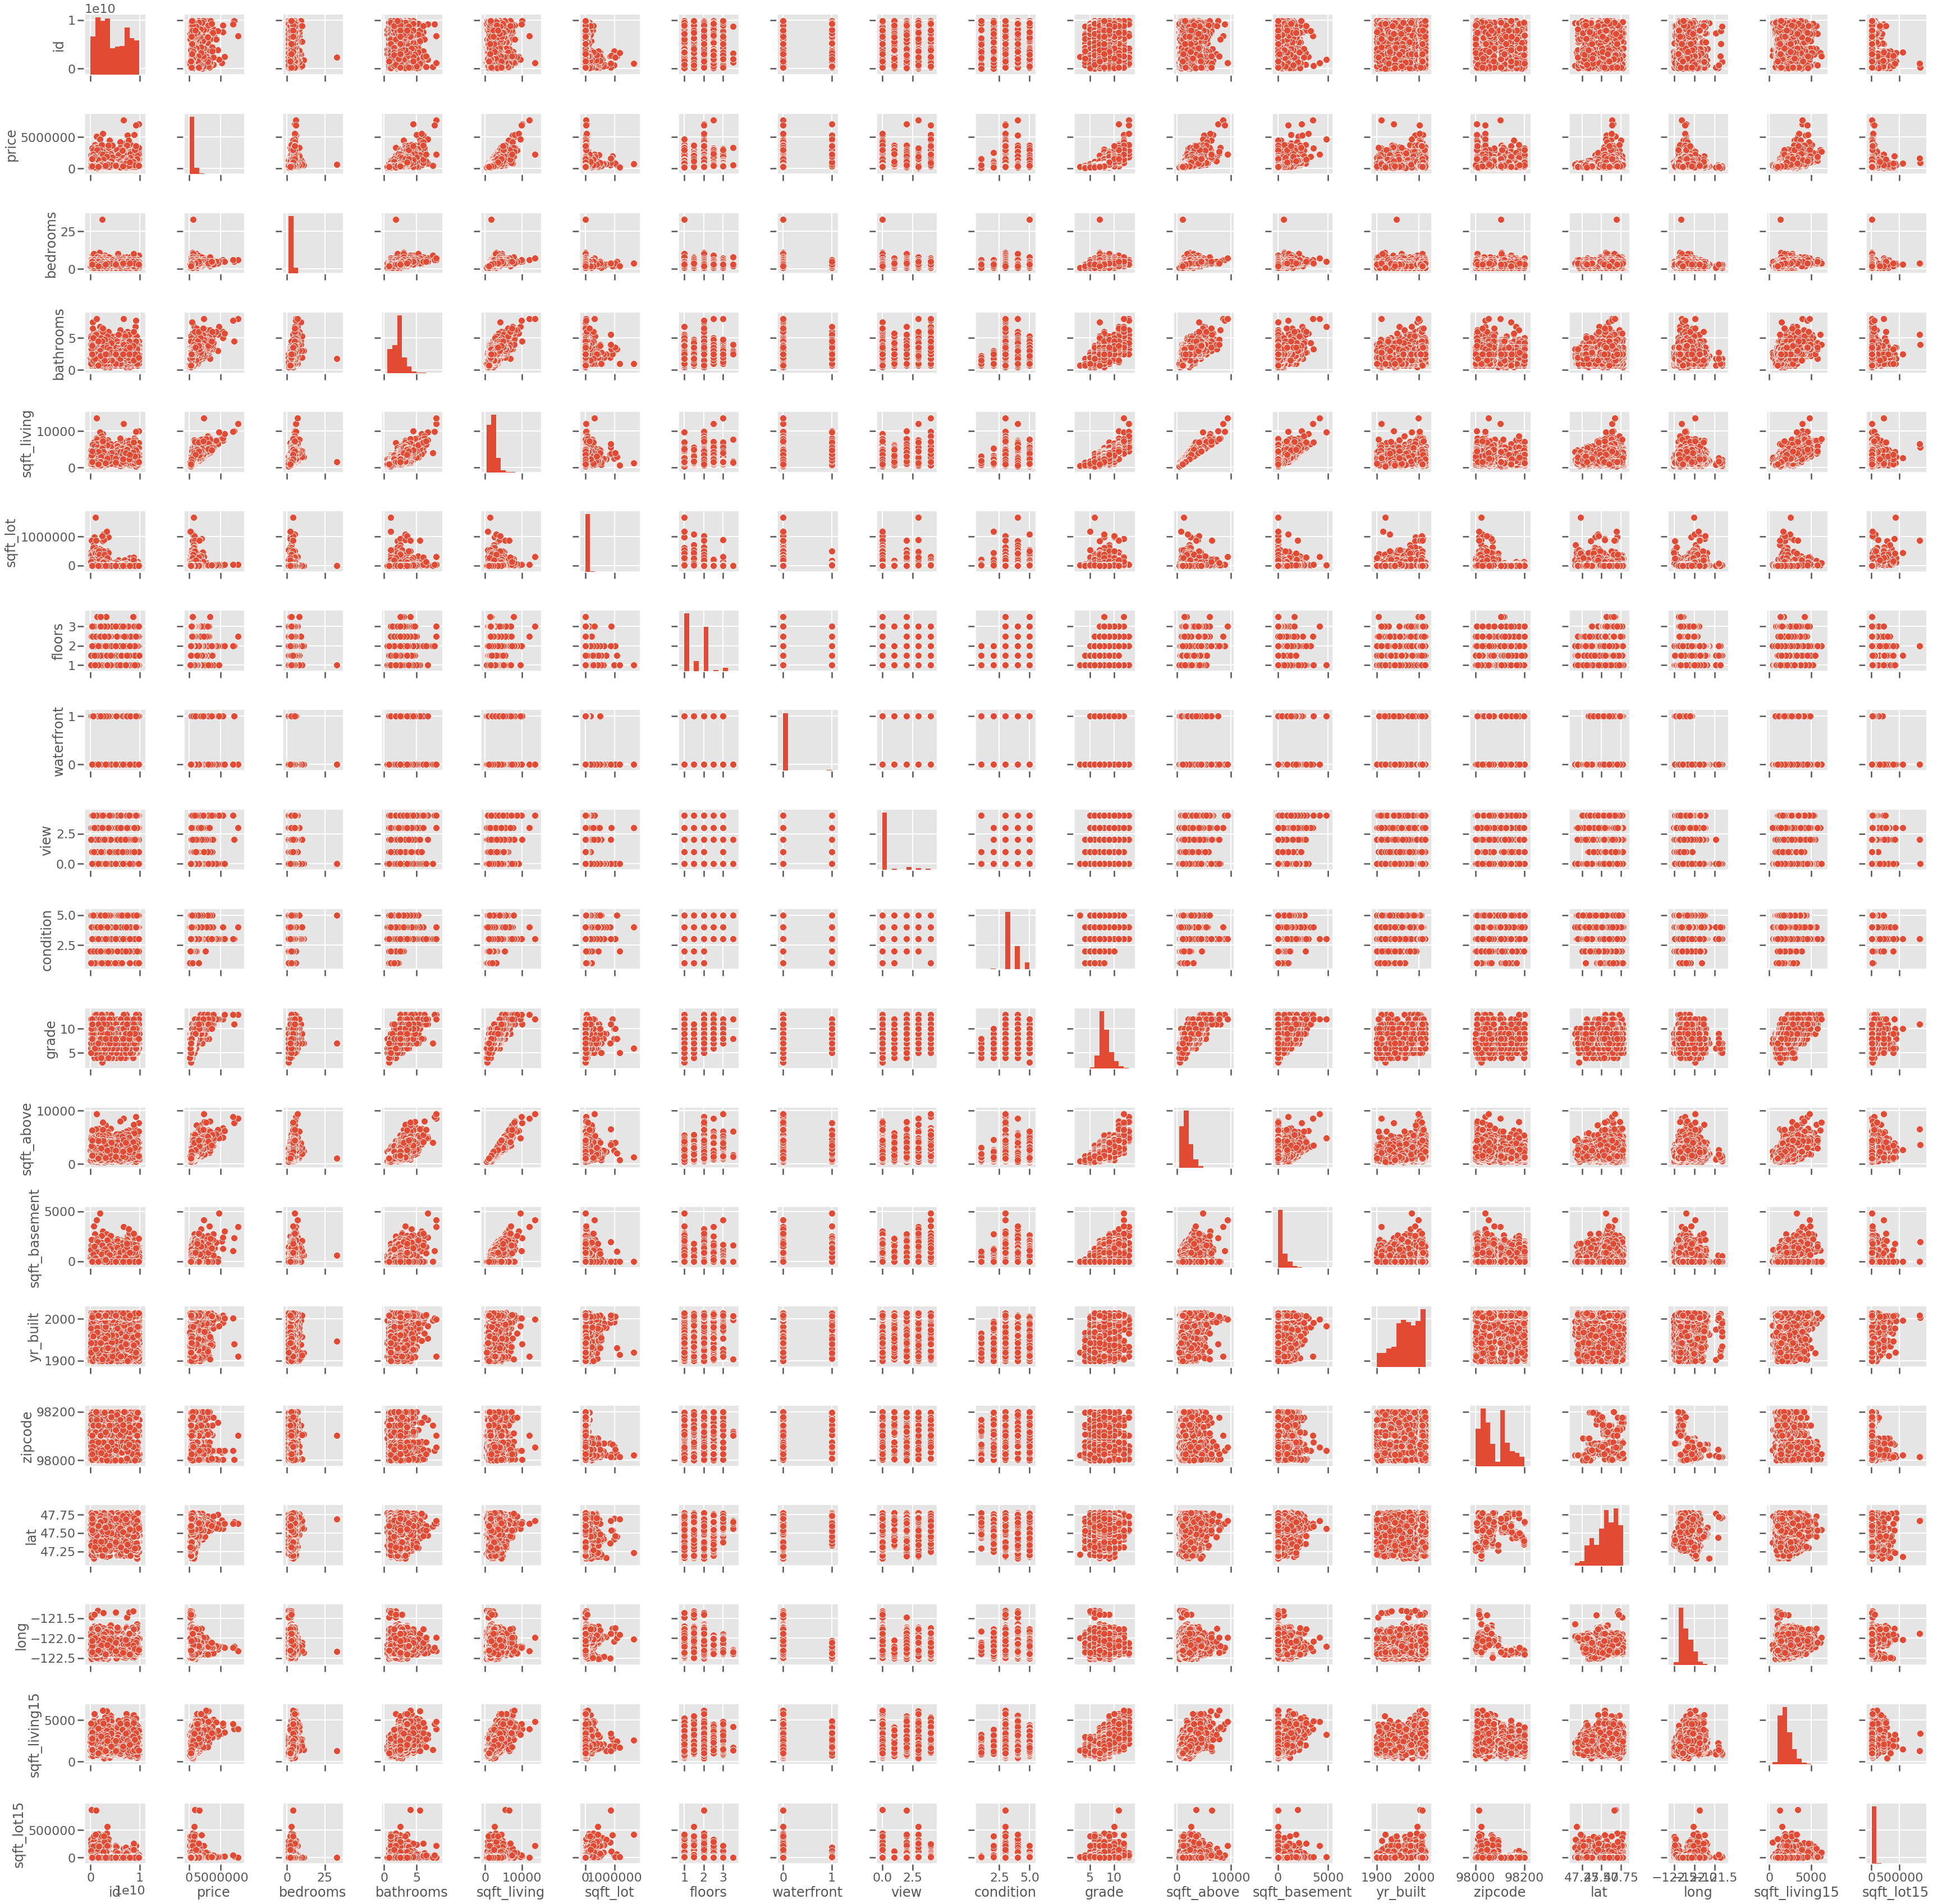

In [39]:

sns.set_context('poster')
sns.pairplot(kc_df) # to see which ones are correlated to each other
# maybe bedrooms, bathrooms, sqft_living, grade, sqft_above, latitude, , sqft_living15

From the pairplot above, we can see that there might be come correlation between price and bedrooms, bathrooms, sqft_living, grade, sqft_above, sqft_living15. We then check the distribution of the predictors byt plotting histogram with kde overlay.

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


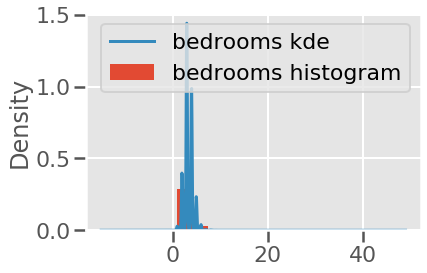

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


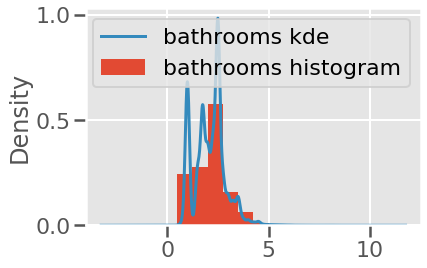

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


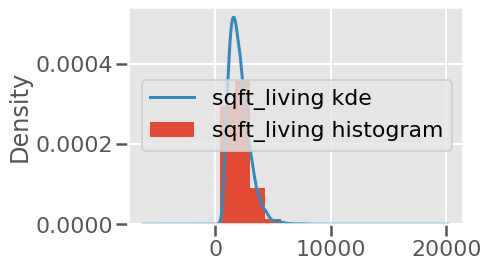

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


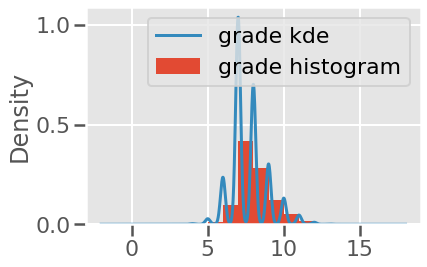

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


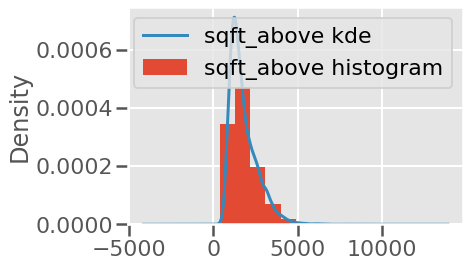

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


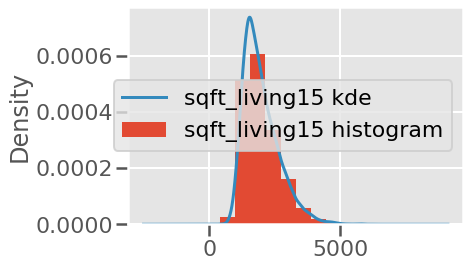

In [40]:
kc_df_predictors = kc_df[['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']]
for column in kc_df_predictors:
    kc_df[column].plot.hist(normed=True, label = column+' histogram')
    kc_df[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

No variable is perfectly normal. Overall, there is no pattern that all of them would follow. Skew in sqft_above, sqft_living and sqft_living15 might be problematic for our analyses. The skewness is positive, howover, kurtosis of bedrooms, bathrooms and grade are leptokurtic, especially in bedrooms. It means that there might be some outliers that can affect the result which will be prone to extreme values. Therefore, we decided to drop the extreme outlier in bedrooms.

In [41]:
kc_df['bedrooms'].unique() # in this case, the extreme outlier is 33

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [42]:
index = kc_df[kc_df['bedrooms']==33].index
kc_df.drop(index, axis = 0, inplace=True)

In [43]:
kc_df['bedrooms'].unique() # the outlier is dropped

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10])

Text(0, 0.5, 'bedrooms')

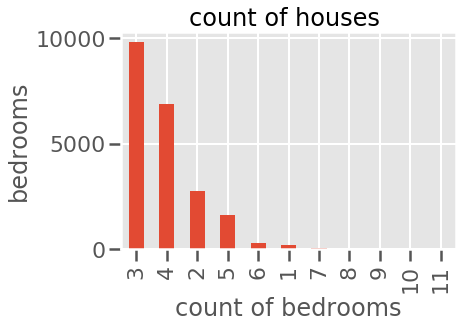

In [77]:
# to see which houses are in demand
kc_df['bedrooms'].value_counts().plot(kind='bar')
plt.title("count of houses ")
plt.xlabel("count of bedrooms")
plt.ylabel("bedrooms")

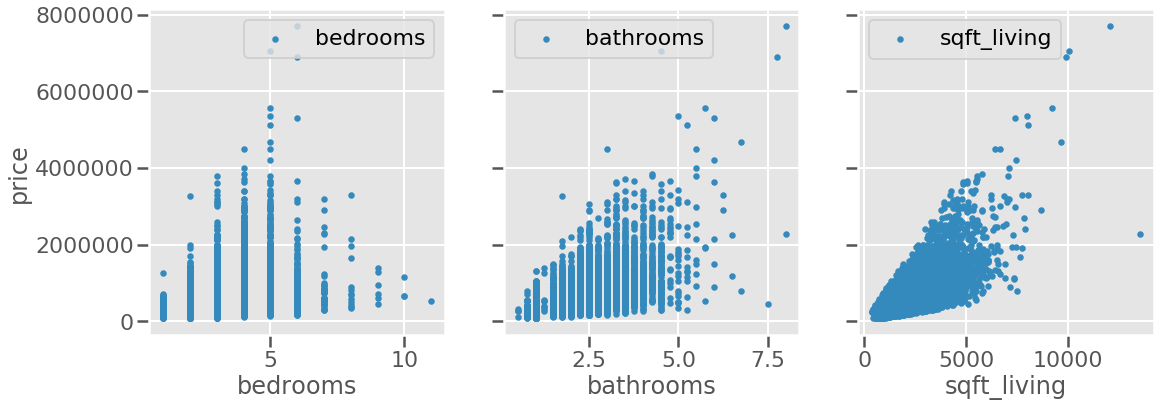

In [44]:
# testing the linearity of the variables for our target - 'price'
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['bedrooms', 'bathrooms', 'sqft_living']):
    kc_df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

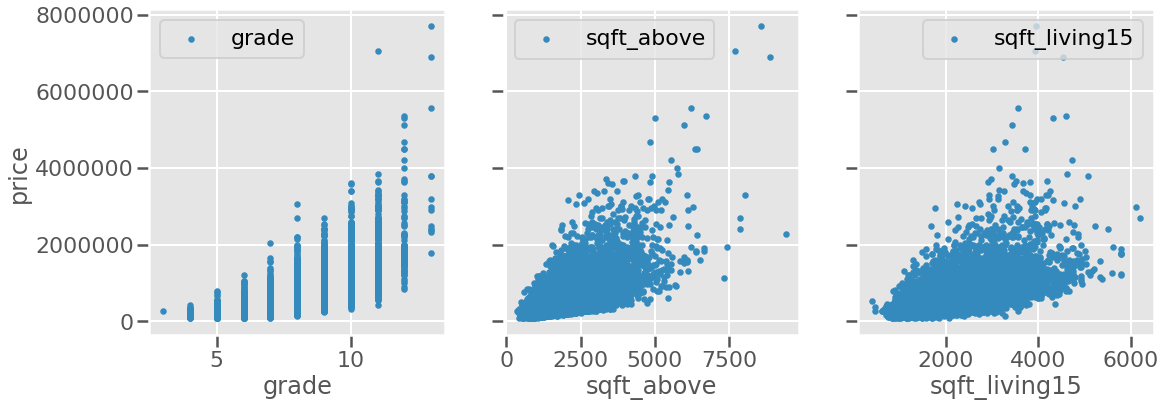

In [45]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['grade', 'sqft_above', 'sqft_living15']):
    kc_df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

There seem to be a strong linear relationship between sqft_living, sqft_living15, sqft_above and price. Bathrooms and grade also have a linear relationship with price but the variance is higher but it is still lower than the variance in bedrooms. 

Since bedrooms does not have a clear linear relationship with price and the variance is quite high. Therefore, we decided to drop bedrooms from our predictors list.


In [46]:
kc_df_pred = kc_df[['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']]

We have already examined the distribution of these predictors. None of them have prefectly normal distribution. However, all of them are positively skewed. Next we will use correlation matrix to see whether there is any multicollinearity of features.

In [47]:
kc_df_pred_price = kc_df[['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'price']]

In [48]:
kc_df_pred_price.corr()

bathrooms  sqft_living     grade  sqft_above  sqft_living15  \
bathrooms       1.000000     0.755755  0.665834    0.686664       0.569878   
sqft_living     0.755755     1.000000  0.762776    0.876448       0.756400   
grade           0.665834     0.762776  1.000000    0.756069       0.713863   
sqft_above      0.686664     0.876448  0.756069    1.000000       0.731756   
sqft_living15   0.569878     0.756400  0.713863    0.731756       1.000000   
price           0.525915     0.701929  0.667964    0.605392       0.585267   

                  price  
bathrooms      0.525915  
sqft_living    0.701929  
grade          0.667964  
sqft_above     0.605392  
sqft_living15  0.585267  
price          1.000000

The most prominent factor affecting price is sqft_living, followed by grade, sqft_above, sqft_living15 and bathrooms.

In [49]:
abs(kc_df_pred_price.corr()) > 0.75

bathrooms  sqft_living  grade  sqft_above  sqft_living15  price
bathrooms           True         True  False       False          False  False
sqft_living         True         True   True        True           True  False
grade              False         True   True        True          False  False
sqft_above         False         True   True        True          False  False
sqft_living15      False         True  False       False           True  False
price              False        False  False       False          False   True

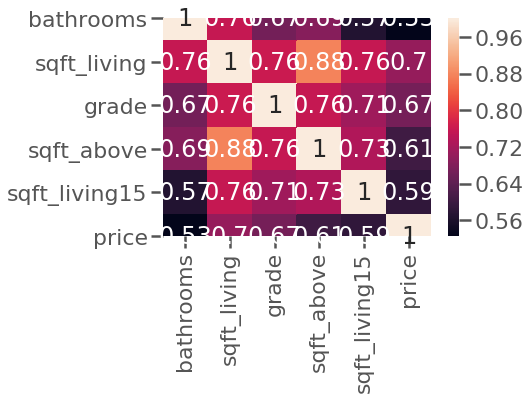

In [50]:
sns.heatmap(kc_df_pred_price.corr(),annot=True)

None of the variables have correlation higher than 0.75. Therefore, we do not need to remove any of them.

# Modeling

## Statsmodel - OLS, simple linear regression

Because sqft_living has the highest correlation with price, we will plot a simple linear regression in sqft_living first.

R-Squared: 0.49270416095391445
Intercept     -44011.542634
sqft_living      280.868805
dtype: float64


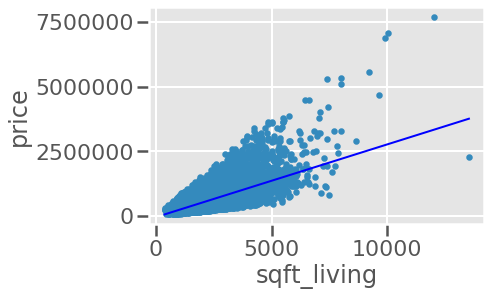

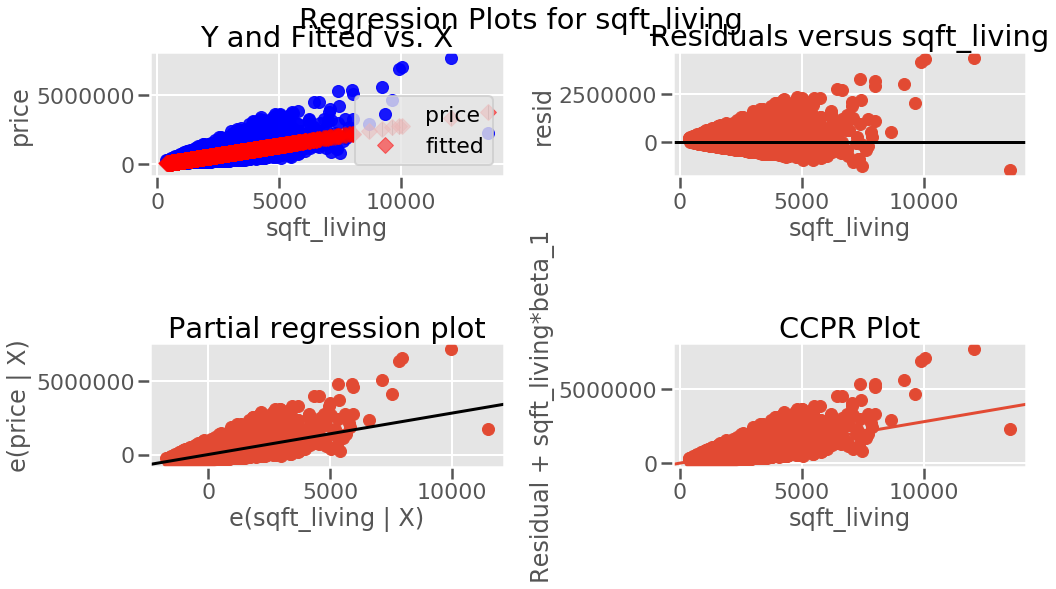

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


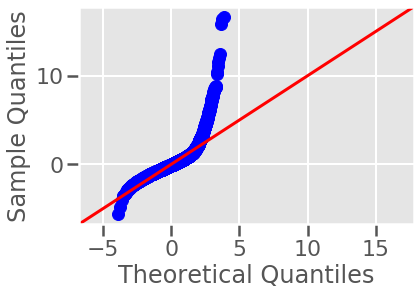

In [51]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
f = 'price~sqft_living'
model = smf.ols(formula=f, data=kc_df).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'sqft_living': [kc_df.sqft_living.min(), kc_df.sqft_living.max()]});
preds = model.predict(X_new)
kc_df.plot(kind='scatter', x='sqft_living', y='price');
plt.plot(X_new, preds, c='blue', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Residual plotting to see whether normalisation needs to be performed.

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:07:11   Log-Likelihood:            -3.0005e+05
No. Observations:               21596   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.401e+04   4410.123     -9.980      0.000   -5.27e+04   -3.54e+04
sqft_living   280.8688      1.939    144.820      0.000     277.067     284.670
==============================================================================
Omnibus:                    14801.492   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542642.481
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-Squared: 0.4461756675744847
Intercept   -1.061467e+06
grade        2.091630e+05
dtype: float64


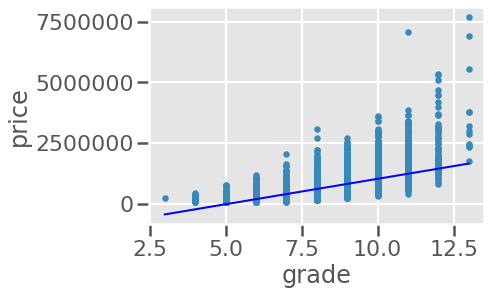

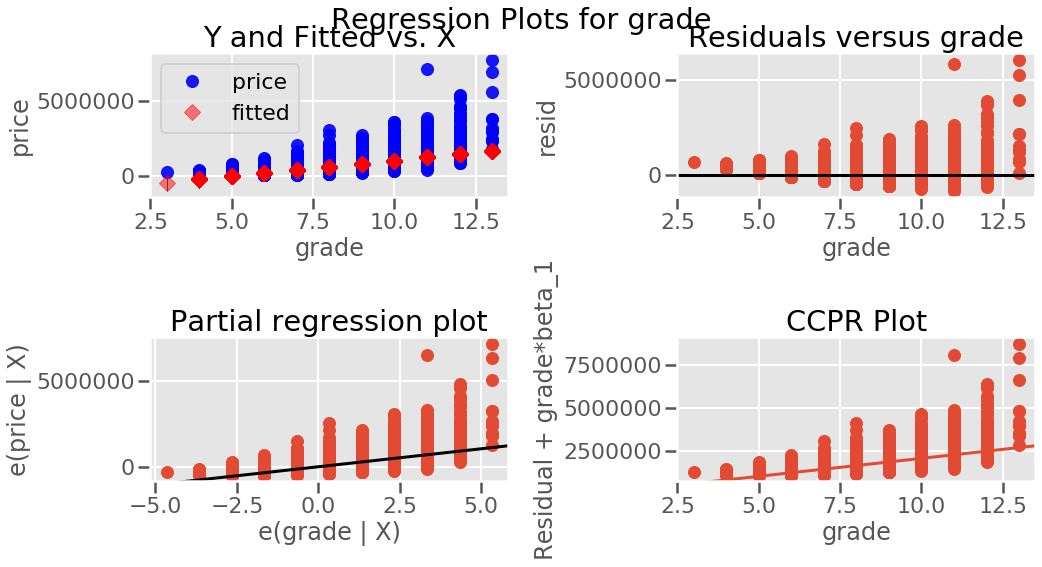

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


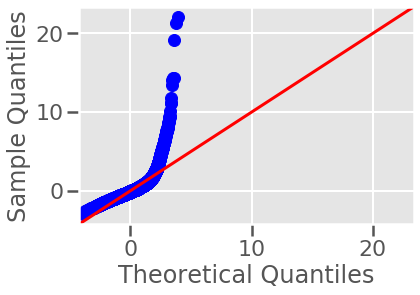

In [53]:
f = 'price~grade'
model = smf.ols(formula=f, data=kc_df).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'grade': [kc_df.grade.min(), kc_df.grade.max()]});
preds = model.predict(X_new)
kc_df.plot(kind='scatter', x='grade', y='price');
plt.plot(X_new, preds, c='blue', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "grade", fig=fig)
plt.show()
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

R-Squared: 0.36649923894520764
Intercept     59715.957878
sqft_above      268.683626
dtype: float64


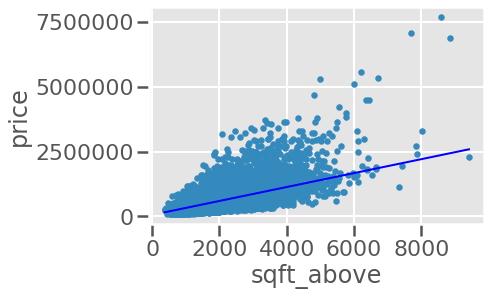

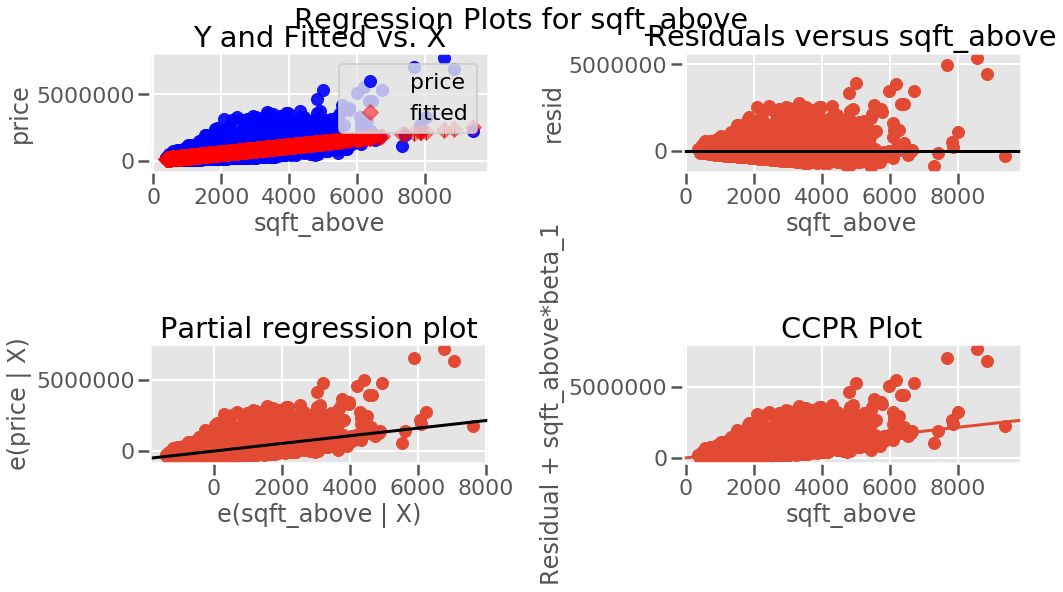

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


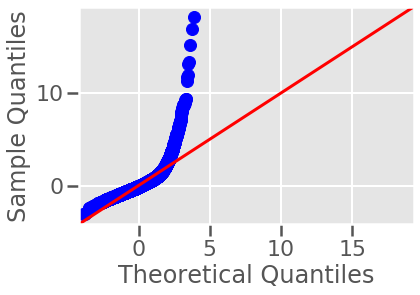

In [54]:
f = 'price~sqft_above'
model = smf.ols(formula=f, data=kc_df).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'sqft_above': [kc_df.sqft_above.min(), kc_df.sqft_above.max()]});
preds = model.predict(X_new)
kc_df.plot(kind='scatter', x='sqft_above', y='price');
plt.plot(X_new, preds, c='blue', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_above", fig=fig)
plt.show()
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

R-Squared: 0.3425370936531008
Intercept       -83081.977185
sqft_living15      313.781344
dtype: float64


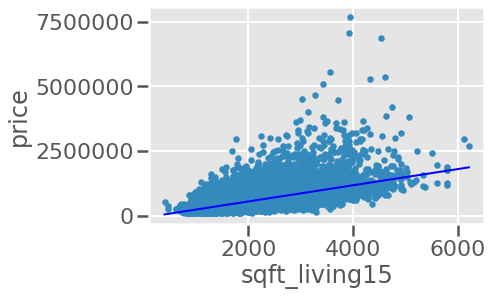

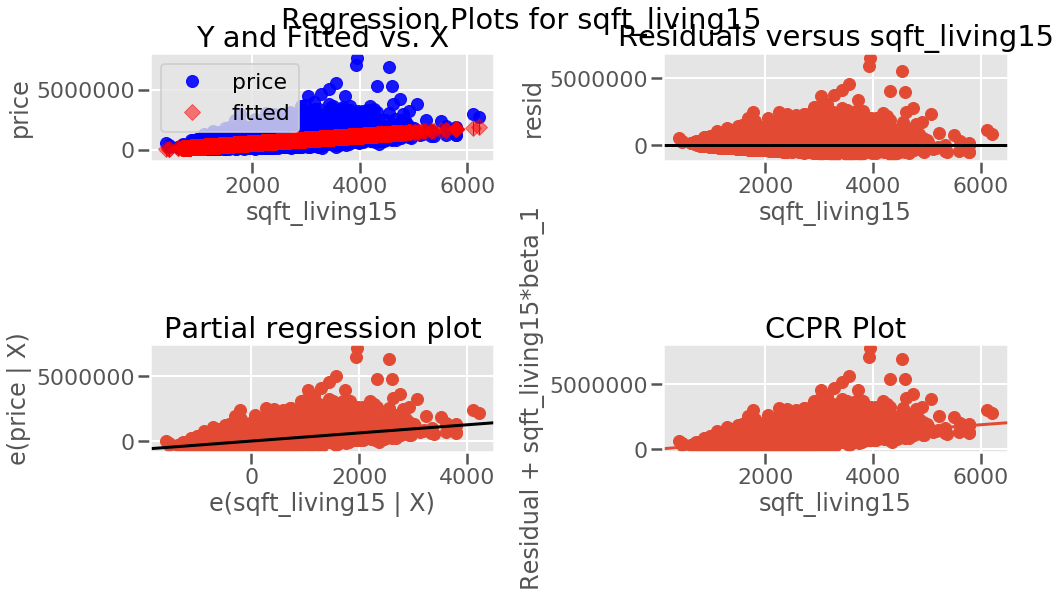

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


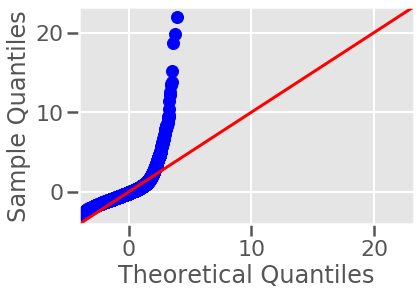

In [55]:
f = 'price~sqft_living15'
model = smf.ols(formula=f, data=kc_df).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'sqft_living15': [kc_df.sqft_living15.min(), kc_df.sqft_living15.max()]});
preds = model.predict(X_new)
kc_df.plot(kind='scatter', x='sqft_living15', y='price');
plt.plot(X_new, preds, c='blue', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living15", fig=fig)
plt.show()
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

R-Squared: 0.2765868532850926
Intercept      8692.164523
bathrooms    251247.251822
dtype: float64


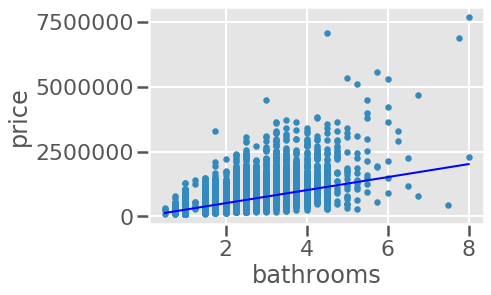

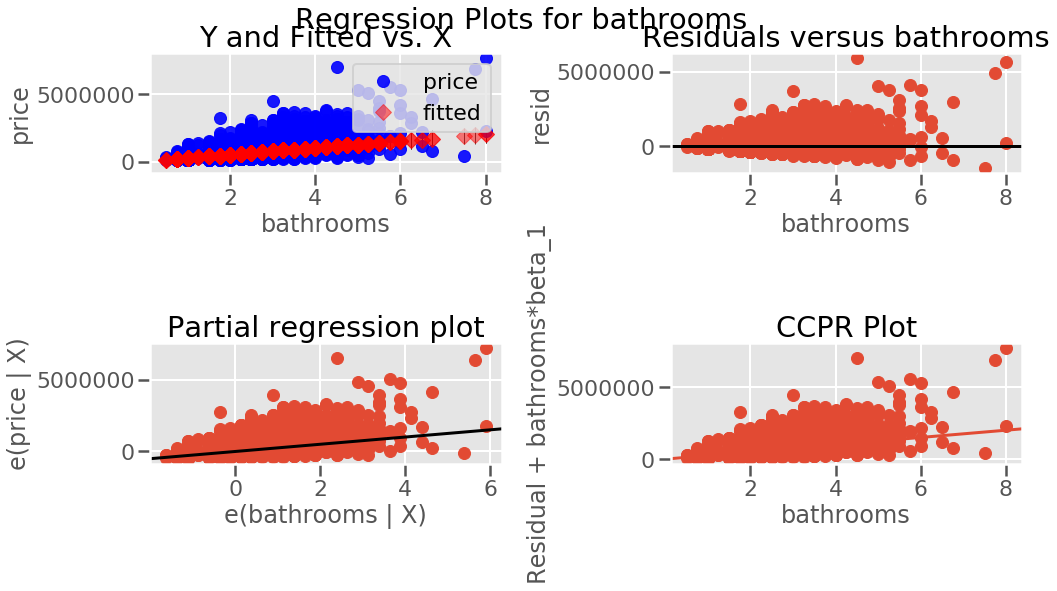

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


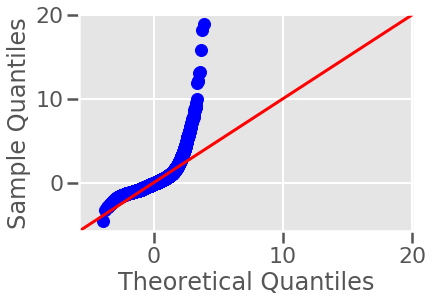

In [56]:
f = 'price~bathrooms'
model = smf.ols(formula=f, data=kc_df).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'bathrooms': [kc_df.bathrooms.min(), kc_df.bathrooms.max()]});
preds = model.predict(X_new)
kc_df.plot(kind='scatter', x='bathrooms', y='price');
plt.plot(X_new, preds, c='blue', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bathrooms", fig=fig)
plt.show()
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Q-Q plots showed that residuals are better distributed for sqft_living but for other variables it is hard to tell. However, there seem to be a lot of outliers in all variables.

P-values for these variables are smaller than 0.05 - normality assumption should, therefore, be accepted. However, JB results are very high which rejects normality assumption.

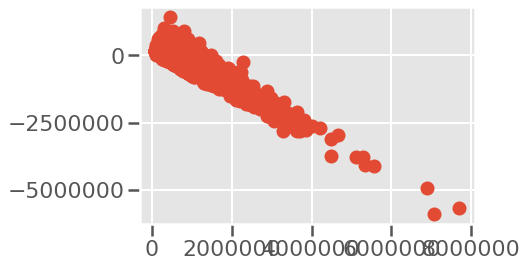

In [57]:
plt.scatter(kc_df['price'], model.predict(kc_df['bathrooms'])-kc_df['price'])

The graph shows that a unit change in sqft_living will lead to negative error and transforming predictors leads to lower R-squared, therefore, we decided to use log transformation on our target variable - price.

In [58]:
kc_df['price'] = np.log(kc_df['price'])

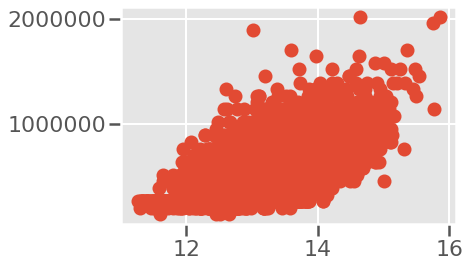

In [59]:
plt.scatter(kc_df['price'], model.predict(kc_df['bathrooms'])-kc_df['price']) # this looks better

R-Squared: 0.4833156614086219
Intercept      12.218728
sqft_living     0.000399
dtype: float64


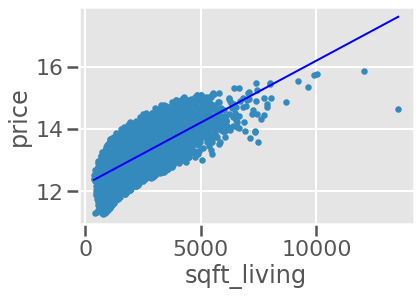

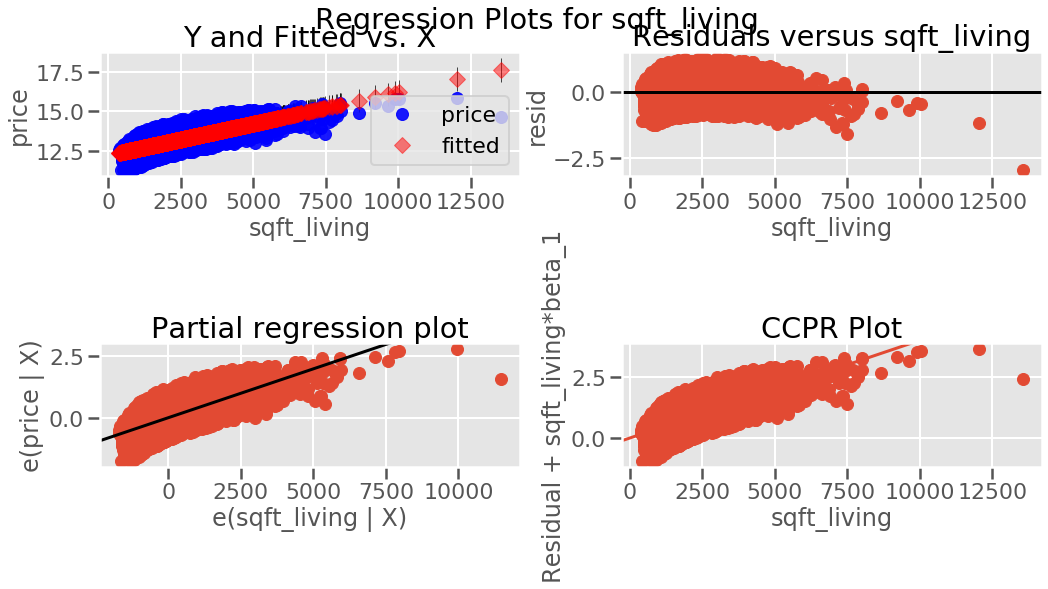

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


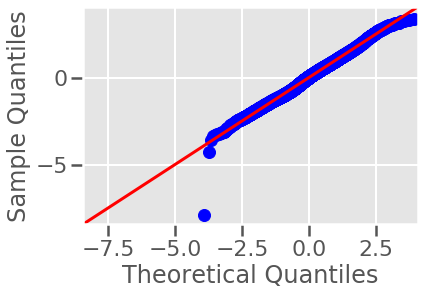

In [60]:
f = 'price~sqft_living'
model = smf.ols(formula=f, data=kc_df).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'sqft_living': [kc_df.sqft_living.min(), kc_df.sqft_living.max()]});
preds = model.predict(X_new)
kc_df.plot(kind='scatter', x='sqft_living', y='price');
plt.plot(X_new, preds, c='blue', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Preparing data for multiple regression, we are checking whether our predictors are categorical or not.

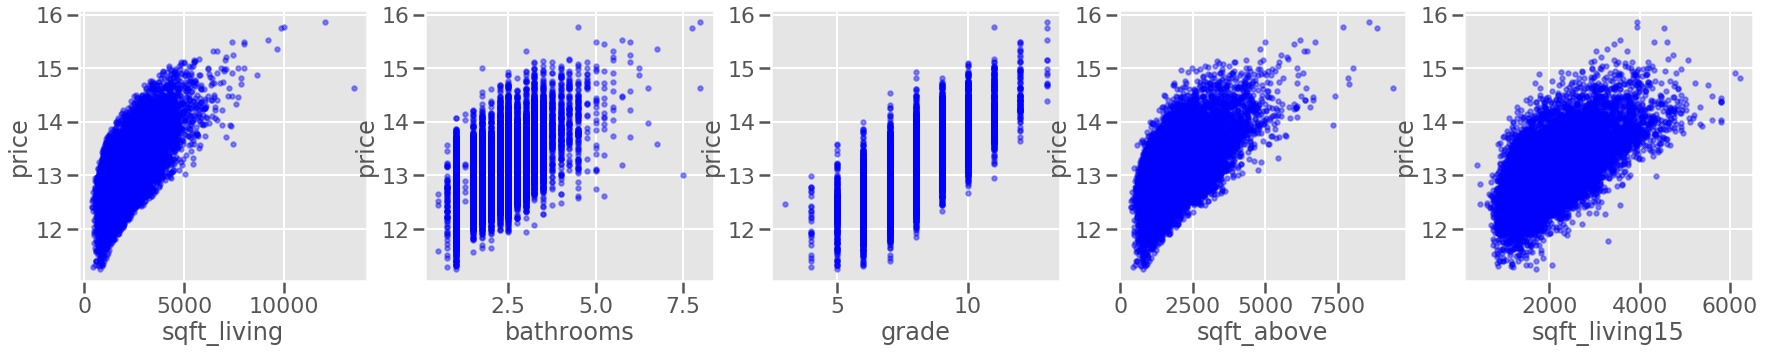

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30,5))

for xcol, ax in zip([ 'sqft_living', 'bathrooms', 'grade', 'sqft_above', 'sqft_living15'], axes):
    kc_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

## Statsmodels - OLS, multiple linear regression

In [62]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
outcome = 'price'
x_cols = ['grade', 'bathrooms', 'sqft_living']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=kc_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     8997.
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:08:24   Log-Likelihood:                -8034.7
No. Observations:               21596   AIC:                         1.608e+04
Df Residuals:                   21592   BIC:                         1.611e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.1707      0.019    597.691      0.000      11.134      11.207
grade           0.1888      0.003     58.607      0.000       0.182       0.195
bathrooms      -0.0187      0.005     -3.858      0.000      -0.028      -0.009
sqft_living     0.0002   4.69e-06     48.306      0.000       0.000       0.000
==============================================================================
Omnibus:                       48.506   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.204
Skew:                           0.107   Prob(JB):                     3.41e-11
Kurtosis:                       2.913   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Sklearn - simple linear regression

In [63]:
#training and testing of data
X=kc_df[['sqft_living']]
y=kc_df['price']
#use cross validation_train_test_split from sklearn to split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


In [64]:
#created an instance of linear regression model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

12.226616767131965
[0.00039509]


Text(0, 0.5, 'predicted values')

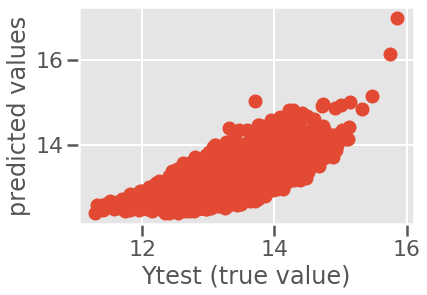

In [66]:
#Predicting Test Data
predictions=regressor.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel("Ytest (true value)")
plt.ylabel("predicted values")
                            

In [67]:
#evaluating the model
#calculate the mean absolue error, mean squared error and the root mean squared error
print("MAE",metrics.mean_absolute_error(y_test,predictions))
metrics.explained_variance_score(y_test,predictions)

MAE 0.30418579536557216


0.4900176307853723

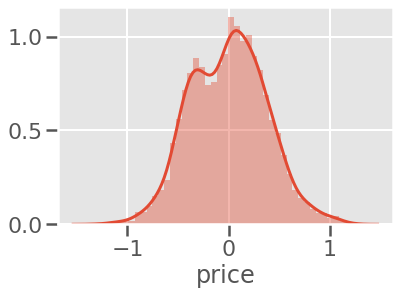

In [68]:
#handling Residual
sns.distplot(y_test-predictions)

## Sklearn - multiple linear regression

In [69]:
#Multiple regression
X= kc_df[['sqft_living', 'grade', 'bathrooms']]
y= kc_df['price']

In [70]:
#use cross validation_train_test_split from sklearn to split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)



In [71]:
#created an instance of linear regression model
regressor1 = LinearRegression()  
regressor1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
#To retrieve the intercept:
print(regressor1.intercept_)
#For retrieving the slope:
print(regressor1.coef_)


11.17224375658104
[ 0.00022255  0.18883596 -0.01537807]


In [73]:
cdf=pd.DataFrame(regressor1.coef_,X.columns,columns=['Coeff'])
cdf.head()

Coeff
sqft_living  0.000223
grade        0.188836
bathrooms   -0.015378

Text(0, 0.5, 'predicted values')

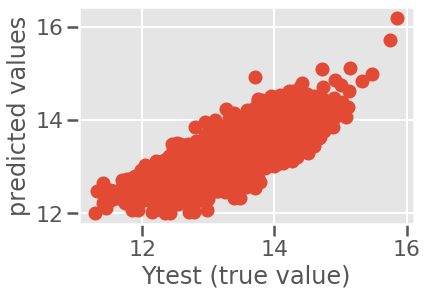

In [74]:
#Predicting Test Data
predictions1=regressor1.predict(X_test)
plt.scatter(y_test,predictions1)
plt.xlabel("Ytest (true value)")
plt.ylabel("predicted values")

In [75]:
#evaluating the model
#calculate the mean absolue error, mean squared error and the root mean squared error
print("MAE",metrics.mean_absolute_error(y_test,predictions1))
print("MSE",metrics.mean_squared_error(y_test,predictions1))
metrics.explained_variance_score(y_test,predictions1)

MAE 0.2794963217833738
MSE 0.12087624230093712


0.5618903372687696